In [74]:
import argparse 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [75]:
import numpy as np
import matplotlib.pyplot as plt


def visualize_classifier(classifier, X, y, title=''):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Specify the title
    plt.title(title)

    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()

In [76]:
# Argument parser 
def build_arg_parser():
    parser = argparse.ArgumentParser(description='Classify data using \
            Ensemble Learning techniques')
    parser.add_argument('--classifier-type', dest='classifier_type', 
            required=True, choices=['rf', 'erf'], help="Type of classifier \
                    to use; can be either 'rf' or 'erf'")
    return parser

In [77]:
types = ['rf', 'erf']

In [78]:
# if __name__=='__main__':
#     # Parse the input arguments
#     args = build_arg_parser().parse_args()
#     classifier_type = args.classifier_type

In [79]:
# Load input data
input_file = '../aiwp-data/data_random_forests.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]
# X.shape, y.shape
# X
# y

In [80]:
# Separate input data into three classes based on labels
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])
class_2 = np.array(X[y==2])
# class_0.shape, class_1.shape, class_2.shape
# class_0

Text(0.5, 1.0, 'Input data')

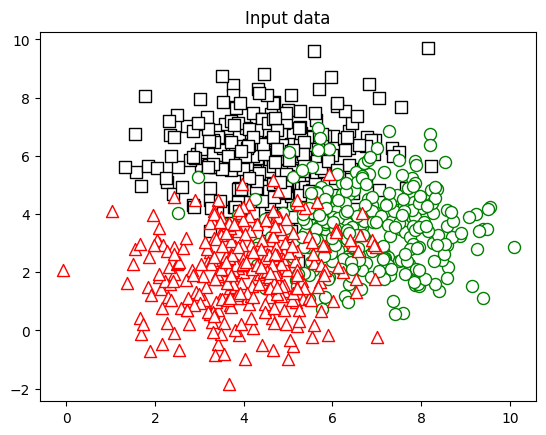

In [81]:
# Visualize input data
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='white', 
                edgecolors='black', linewidth=1, marker='s')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', 
                edgecolors='green', linewidth=1, marker='o')
plt.scatter(class_2[:, 0], class_2[:, 1], s=75, facecolors='white', 
                edgecolors='red', linewidth=1, marker='^')
plt.title('Input data')

In [98]:
size_, rand, rand_state, max_depth_ = 0.25, 5, 0, 4    # 0.25, 5, 0, 4   | 0.2, 8, 3, 5

In [99]:
# # Split data into training and testing datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size_, random_state=rand)

In [100]:
classifier_type = types[0]

In [101]:
# Ensemble Learning classifier
params = {'n_estimators': 100, 'max_depth': max_depth_, 'random_state': rand_state}
if classifier_type == 'rf':
    classifier = RandomForestClassifier(**params)
else:
    classifier = ExtraTreesClassifier(**params)

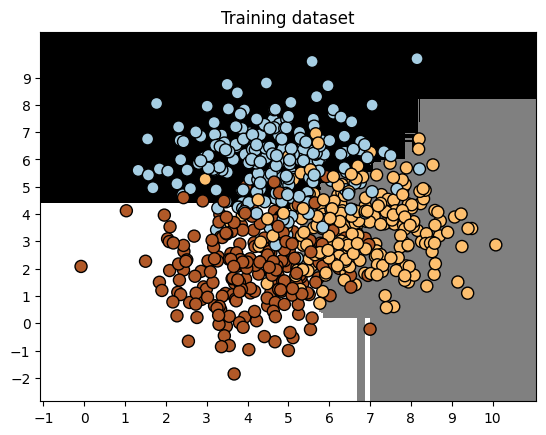

In [102]:
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

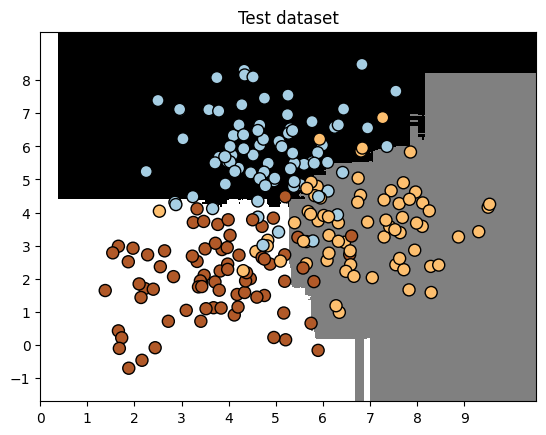

In [103]:
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

In [104]:
# Evaluate classifier performance
class_names = ['Class-0', 'Class-1', 'Class-2']
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
print("#"*40 + "\n")
print("Classifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))


Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.91      0.86      0.88       221
     Class-1       0.84      0.87      0.86       230
     Class-2       0.86      0.87      0.86       224

    accuracy                           0.87       675
   macro avg       0.87      0.87      0.87       675
weighted avg       0.87      0.87      0.87       675

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.92      0.85      0.88        79
     Class-1       0.86      0.84      0.85        70
     Class-2       0.84      0.92      0.88        76

    accuracy                           0.87       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.87      0.87      0.87       225




Confidence measure:

Datapoint: [5 5]
Probabilities: [0.81427532 0.08639273 0.09933195]
Predicted class: Class-0

Datapoint: [3 6]
Probabilities: [0.93574458 0.02465345 0.03960197]
Predicted class: Class-0

Datapoint: [6 4]
Probabilities: [0.12232404 0.7451078  0.13256816]
Predicted class: Class-1

Datapoint: [7 2]
Probabilities: [0.05415465 0.70660226 0.23924309]
Predicted class: Class-1

Datapoint: [4 4]
Probabilities: [0.20594744 0.15523491 0.63881765]
Predicted class: Class-2

Datapoint: [5 2]
Probabilities: [0.05403583 0.0931115  0.85285267]
Predicted class: Class-2


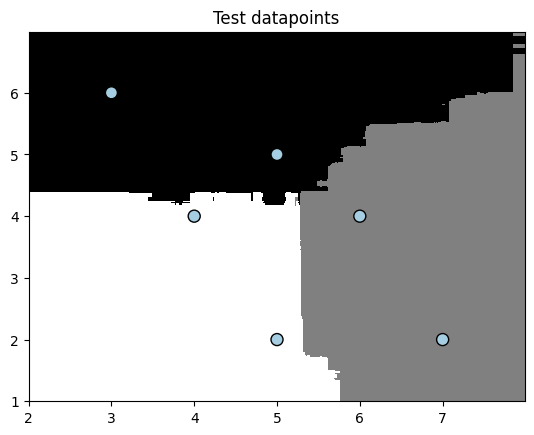

In [107]:
# Compute confidence
test_datapoints = np.array([[5, 5], [3, 6], [6, 4], [7, 2], [4, 4], [5, 2]])

print("\nConfidence measure:")
for datapoint in test_datapoints:
    probabilities = classifier.predict_proba([datapoint])[0]
    predicted_class = 'Class-' + str(np.argmax(probabilities))
    print('\nDatapoint:', datapoint)
    print('Probabilities:', probabilities)
    print('Predicted class:', predicted_class) 

# Visualize the datapoints
visualize_classifier(classifier, test_datapoints, [0]*len(test_datapoints), 'Test datapoints')